# Computational Social Science Project #3 

*Group number:* 5

*Group members:* Steven Herrera Tenorio, Michi Kakebayashi, Daniela Perez, and Noah Bender   

*Semester:* Fall 2022

In [37]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn import tree
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore')
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [38]:
# Inspections Data 2011 - 2013
chicago_inspections_2011_to_2013 = pd.read_csv("data/Chicago Inspections 2011-2013.csv", 
                                              low_memory=False)

# Inspections Data 2014
chicago_inspections_2014 = pd.read_csv("data/Chicago Inspections 2014.csv", 
                                      low_memory=False)

In [39]:
chicago_inspections_2011_to_2013.shape

(17677, 75)

In [40]:
# Look at the inspections data
chicago_inspections_2011_to_2013.head()

,Inspection_ID,Inspection_Date,DBA_Name,AKA_Name,License,Facility_Type,Risk,Address,City,State,Zip,Inspection_Type,Results,Latitude,Longitude,Location,Facility_Type_Clean,criticalCount,seriousCount,minorCount,pass_flag,fail_flag,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,ID,LICENSE_ID,ACCOUNT_NUMBER,LEGAL_NAME,DOING_BUSINESS_AS_NAME,ADDRESS,CITY,STATE,ZIP_CODE,WARD,PRECINCT,WARD_PRECINCT,POLICE_DISTRICT,LICENSE_CODE,LICENSE_DESCRIPTION,BUSINESS_ACTIVITY_ID,BUSINESS_ACTIVITY,LICENSE_NUMBER,APPLICATION_TYPE,LICENSE_TERM_START_DATE,LICENSE_TERM_EXPIRATION_DATE,LICENSE_STATUS,LATITUDE,LONGITUDE,minDate,maxDate,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound
0,269961,2013-01-31,SEVEN STAR,SEVEN STAR,30790,Grocery Store,Risk 3 (Low),3352 N BROADWAY,CHICAGO,IL,60657.0,Canvass,Pass,41.943359,-87.644999,"(41.943359344775146, -87.64499875300952)",Other,0,0,2,1,0,0,0,0,0,2.0,1,30790-20110416,2081412.0,63759.0,VIRGINIA DELA ROSA,SEVEN STAR,3352 N BROADWAY 1,CHICAGO,IL,60657.0,44.0,33.0,44-33,19.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,30790.0,RENEW,2011-04-16,2013-04-15,AAI,41.943359,-87.644999,2002-02-16,2015-04-15,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0
1,507211,2011-10-18,PANERA BREAD,PANERA BREAD,1475890,Restaurant,Risk 1 (High),6059 N LINCOLN AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.991919,-87.709631,"(41.99191947239194, -87.70963133440333)",Restaurant,0,0,3,1,0,0,0,0,0,2.0,1,1475890-20110416,2081695.0,207283.0,"PANERA, LLC",PANERA BREAD,6059 N LINCOLN AVE C,CHICAGO,IL,60659.0,50.0,23.0,50-23,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1475890.0,RENEW,2011-04-16,2013-04-15,AAI,41.991919,-87.709631,2004-05-05,2019-04-15,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0
2,507212,2011-10-18,LITTLE QUIAPO RESTAURANT,LITTLE QUIAPO RESTAURANT,1740130,Restaurant,Risk 1 (High),6259 N MCCORMICK RD,CHICAGO,IL,60659.0,Canvass,Fail,41.995632,-87.712707,"(41.99563177556418, -87.71270678169132)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1740130-20110216,2070145.0,3107.0,ENELITA GARCIA,LITTLE QUIAPO RESTAURANT,6259 N MCCORMICK RD,CHICAGO,IL,60659.0,50.0,25.0,50-25,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1740130.0,RENEW,2011-02-16,2013-02-15,AAI,41.995632,-87.712707,2007-03-22,2017-02-15,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0
3,507216,2011-10-19,SERGIO'S TAQUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA,1447363,Restaurant,Risk 1 (High),3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.982933,-87.710982,"(41.982933189164974, -87.71098225381141)",Restaurant,0,0,6,1,0,0,0,0,0,2.0,1,1447363-20110216,2071895.0,270993.0,SERGIO'S TAZUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA INC.,3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,39.0,48.0,39-48,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1447363.0,RENEW,2011-02-16,2013-02-15,AAI,41.982933,-87.710982,2003-12-31,2019-02-15,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0
4,507219,2011-10-20,TARGET STORE # T-2079,TARGET,1679459,Restaurant,Risk 2 (Medium),2112 W PETERSON AVE,CHICAGO,IL,60659.0,Canvass,Fail,41.990729,-87.682979,"(41.99072921796059, -87.68297945359863)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1679459-20100216,2009972.0,15538.0,TARGET CORPORATION,TARGET STORE # T-2079,2112 W PETERSON AVE,CHICAGO,IL,60659.0,40.0,18.0,40-18,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1679459.0,RENEW,

In [41]:
# List column names
chicago_inspections_2011_to_2013.columns

Index(['Inspection_ID', 'Inspection_Date', 'DBA_Name', 'AKA_Name', 'License',
       'Facility_Type', 'Risk', 'Address', 'City', 'State', 'Zip',
       'Inspection_Type', 'Results', 'Latitude', 'Longitude', 'Location',
       'Facility_Type_Clean', 'criticalCount', 'seriousCount', 'minorCount',
       'pass_flag', 'fail_flag', 'pastFail', 'pastCritical', 'pastSerious',
       'pastMinor', 'timeSinceLast', 'firstRecord', 'ID', 'LICENSE_ID',
       'ACCOUNT_NUMBER', 'LEGAL_NAME', 'DOING_BUSINESS_AS_NAME', 'ADDRESS',
       'CITY', 'STATE', 'ZIP_CODE', 'WARD', 'PRECINCT', 'WARD_PRECINCT',
       'POLICE_DISTRICT', 'LICENSE_CODE', 'LICENSE_DESCRIPTION',
       'BUSINESS_ACTIVITY_ID', 'BUSINESS_ACTIVITY', 'LICENSE_NUMBER',
       'APPLICATION_TYPE', 'LICENSE_TERM_START_DATE',
       'LICENSE_TERM_EXPIRATION_DATE', 'LICENSE_STATUS', 'LATITUDE',
       'LONGITUDE', 'minDate', 'maxDate', 'ageAtInspection',
       'consumption_on_premises_incidental_activity', 'tobacco',
       'package_goods',

In [42]:
# Drop column names related to geography, identification, and pass/fail flags that perfectly predict the outcome
chicago_inspections_2011_to_2013.drop(columns = ['AKA_Name', 
                                                 'License',
                                                'Address',
                                                'City',
                                                'State',
                                                'Zip',
                                                'Latitude',
                                                'Longitude',
                                                'Location',
                                                'ID',
                                                'LICENSE_ID',
                                                 'LICENSE_TERM_START_DATE',
                                                 'LICENSE_TERM_EXPIRATION_DATE',
                                                 'LICENSE_STATUS',
                                                'ACCOUNT_NUMBER',
                                                'LEGAL_NAME',
                                                'DOING_BUSINESS_AS_NAME',
                                                'ADDRESS',
                                                'CITY',
                                                'STATE',
                                                'ZIP_CODE',
                                                'WARD',
                                                'PRECINCT',
                                                'LICENSE_CODE',
                                                'BUSINESS_ACTIVITY_ID',
                                                'BUSINESS_ACTIVITY',
                                                'LICENSE_NUMBER',
                                                'LATITUDE',
                                                'LONGITUDE',
                                                'pass_flag',
                                                'fail_flag'],
                                     inplace = True)

chicago_inspections_2011_to_2013.set_index(['Inspection_ID', 'DBA_Name'], inplace = True)

In [43]:
# Convert the Inspection Date to a datetime format
chicago_inspections_2011_to_2013['Inspection_Date'] = pd.to_datetime(chicago_inspections_2011_to_2013['Inspection_Date'], infer_datetime_format=True)  

## Visualization

What do inspections look like over time?

<AxesSubplot:title={'center':'Inspections by Month and Year'}, xlabel='Inspection_MonthYear'>

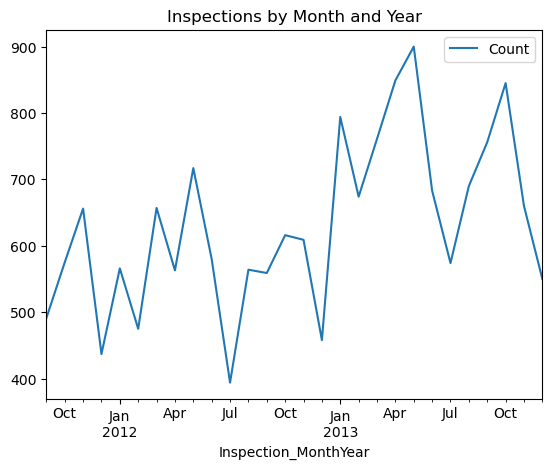

In [8]:
# Visualize Inspections Over Time
chicago_inspections_2011_to_2013['Inspection_MonthYear'] = chicago_inspections_2011_to_2013['Inspection_Date'].dt.to_period('M')
counts_by_day = chicago_inspections_2011_to_2013.groupby('Inspection_MonthYear').count().rename(columns = {'Facility_Type': 'Count'})['Count'].reset_index()
counts_by_day.set_index(["Inspection_MonthYear"], inplace = True)
counts_by_day.plot(title = "Inspections by Month and Year") 

What do the results look like? 

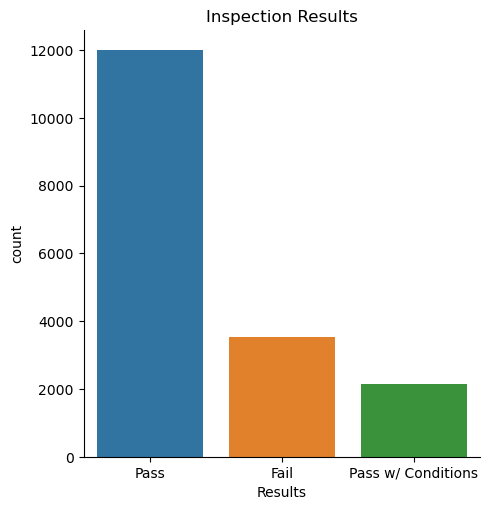

In [44]:
# Inspection Results
sns.catplot(data = chicago_inspections_2011_to_2013,
           x = "Results",
           kind = "count")

plt.title("Inspection Results")
plt.show()

What if we separate by facility type?

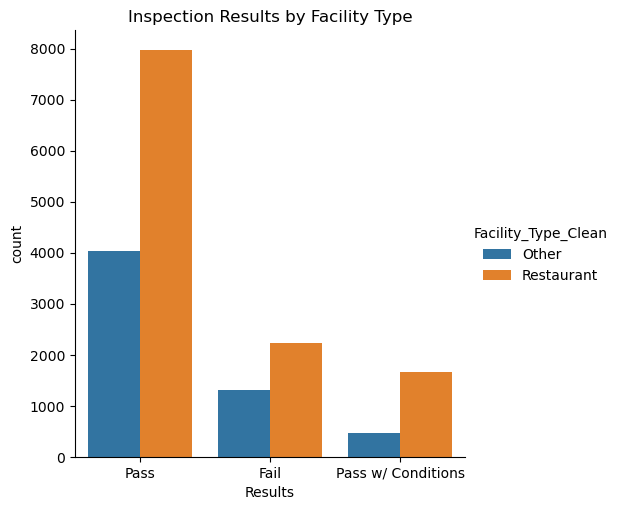

In [45]:
# Inspection Results by Facility Type (Restaurant or Not)
sns.catplot(data = chicago_inspections_2011_to_2013,
           x = "Results",
           kind = "count",
           hue = 'Facility_Type_Clean')

plt.title("Inspection Results by Facility Type")
plt.show()

## Preprocess Data

In [11]:
# Drop datetime info
chicago_inspections_2011_to_2013 = chicago_inspections_2011_to_2013.dropna().drop(['Inspection_Date',
                                      'minDate',
                                      'maxDate',
                                      'Inspection_MonthYear'],
                                      axis = 1)

In [12]:
# Set target variable. 
y = chicago_inspections_2011_to_2013['Results']
## Check for both targets with binary and ternary outcomes
## e.g., y_binary = {Pass (Includes Pass w/ Conditions), Fail}, y_ternary = {Pass, Fail, Pass w/ Conditions}
y_binary = y.replace({'Pass w/ Conditions': 'Pass'})
y_ternary = y
lb_style = LabelBinarizer()
y_binary = lb_style.fit_transform(y_binary)
y_ternary = np.transpose([y_ternary.replace({'Pass': 0, 'Fail': 1, 'Pass w/ Conditions': 2})])
# Recode 0s and 1s so 1s are "Fail"
y_binary = np.where(y_binary == 1, 0 ,1)

# All other features in X
X = chicago_inspections_2011_to_2013.drop(columns = ['Results'])
X = pd.get_dummies(X)

# Set seed
np.random.seed(10)

#Binary outcome
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X, y_binary, 
                                                    train_size = .80, test_size=0.20, stratify=y_binary)
X_train_b, X_validate_b, y_train_b, y_validate_b = train_test_split(X_train_b, y_train_b, 
                                                            train_size = .75, test_size = .25, stratify = y_train_b)

#Ternary outcome
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(X, y_ternary, 
                                                    train_size = .80, test_size=0.20, stratify=y_ternary)
X_train_t, X_validate_t, y_train_t, y_validate_t = train_test_split(X_train_t, y_train_t, 
                                                            train_size = .75, test_size = .25, stratify = y_train_t)

In [13]:
X.head()

criticalCount  seriousCount  \
Inspection_ID DBA_Name                                                    
269961        SEVEN STAR                                0             0   
507211        PANERA BREAD                              0             0   
507212        LITTLE QUIAPO RESTAURANT                  0             2   
507216        SERGIO'S TAQUERIA PIZZA INC.              0             0   
507219        TARGET STORE # T-2079                     0             2   

                                            minorCount  pastFail  \
Inspection_ID DBA_Name                                             
269961        SEVEN STAR                             2         0   
507211        PANERA BREAD                           3         0   
507212        LITTLE QUIAPO RESTAURANT               6         0   
507216        SERGIO'S TAQUERIA PIZZA INC.           6         0   
507219        TARGET STORE # T-2079                  6         0   

                                            pastCritical  pastSerious  \
Inspection_ID DBA_Name                                                  
269961        SEVEN STAR                               0            0   
507211        PANERA BREAD                             0            0   
507212        LITTLE QUIAPO RESTAURANT                 0            0   
507216        SERGIO'S TAQUERIA PIZZA INC.             0            0   
507219        TARGET STORE # T-2079                    0            0   

                                            pastMinor  timeSinceLast  \
Inspection_ID DBA_Name                                                 
269961        SEVEN STAR                            0            2.0   
507211        PANERA BREAD                          0            2.0   
507212        LITTLE QUIAPO RESTAURANT              0            2.0   
507216        SERGIO'S TAQUERIA PIZZA INC.          0            2.0   
507219        TARGET STORE # T-2079                 0            2.0   

                                            firstRecord  POLICE_DISTRICT  \
Inspection_ID DBA_Name                                                     
269961        SEVEN STAR                              1             19.0   
507211        PANERA BREAD                            1             24.0   
507212        LITTLE QUIAPO RESTAURANT                1             17.0   
507216        SERGIO'S TAQUERIA PIZZA INC.            1             17.0   
507219        TARGET STORE # T-2079                   1             24.0   

                                            ageAtInspection  \
Inspection_ID DBA_Name                                        
269961        SEVEN STAR                          10.964384   
507211        PANERA BREAD                         7.457534   
507212        LITTLE QUIAPO RESTAURANT             4.578082   
507216        SERGIO'S TAQUERIA PIZZA INC.         7.805479   
507219        TARGET STORE # T-2079                5.290411   

                                            consumption_on_premises_incidental_activity  \
Inspection_ID DBA_Name                                                                    
269961        SEVEN STAR                                                              0   
507211        PANERA BREAD                                                            0   
507212        LITTLE QUIAPO RESTAURANT                                                0   
507216        SERGIO'S TAQUERIA PIZZA INC.                                            0   
507219        TARGET STORE # T-2079                                                   0   

                                            tobacco  package_goods  \
Inspection_ID DBA_Name                                               
269961        SEVEN STAR                          1              0   
507211        PANERA BREAD                        0              0   
507212        LITTLE QUIAPO RESTAURANT            0              0   
507216        SERGIO'S TAQUERIA PIZZA INC.        0          

## Fit Models

Be sure to do the following:

1. Import the appropriate library from sklearn
2. Set up a hyperparameter grid (check out our previous labs to see how to do this)
3. Find the best hyperparameters, and then fit your model (using train/validation splits or cross-validation)

## Model 1 (Decision Trees: Steven)

**Logic**: We use decision trees to predict where each observation belongs in the "most commonly occurring class of training observations in the region to which it belongs." Using this method, we can understand the class prediction corresponding to a particular node region AND the class proportions among the training observations that fall into that region.

**Assumptions**: If we assume the relationship between the features and our respone variable, **Inspection Result**, to be non-linear and complex, then decision trees are preferred over linear regression.

**Pros**: Very easy to explain, mirror decision-making among humans than other classification techniques, can be displayed graphically, and can handle qualitative predictors without needing to make dummy variables.

**Cons**: Usually have less predictive accuracy than traditional regression techniques and can lack robustness.

**Why It's a Plausible Choice**: We are interested in assessing which variables (and by how much) influence the decision-making of an inspector's choice. Below, we assess two models: one with the binary outcome (Pass or Fail), and another with a ternary outcome (Pass, Fail, or Pass with Conditions).

### Binary Outcome Model

In [14]:
# Initialize a Decision Tree Classifier
dt_classifier = tree.DecisionTreeClassifier(criterion='gini',  # or 'entropy' for information gain
                       splitter='best',  # or 'random' for random best split
                       max_depth=None,  # how deep tree nodes can go
                       min_samples_split=2,  # samples needed to split node
                       min_samples_leaf=1,  # samples needed for a leaf
                       min_weight_fraction_leaf=0.0,  # weight of samples needed for a node
                       max_features=None,  # number of features to look for when splitting
                       max_leaf_nodes=None,  # max nodes
                       min_impurity_decrease=1e-07, #early stopping
                       random_state = 10) #random seed

In [15]:
# Decision Tree Model for Binary Outcome
dt_model_binary = dt_classifier.fit(X_train_b, y_train_b)

#Hyperparamater Grid
param_grid = {'criterion': ['gini', 'entropy', 'log_loss'],
              'splitter': ['best', 'random'],
              'min_samples_split': [2, 3],
              'min_samples_leaf': [1,2],
              'random_state': [10, 20]}

# Finding the Best Parameters with Hyperparameter Grid Search
dt_grid_binary = GridSearchCV(dt_model_binary, param_grid, cv=3)

In [16]:
# Fit the Best Parameters
dt_grid_binary.fit(X_train_b,y_train_b)

GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(min_impurity_decrease=1e-07,
                                              random_state=10),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3], 'random_state': [10, 20],
                         'splitter': ['best', 'random']})

In [17]:
# Get Best Parameter Conditions
before_binary_pred = dt_model_binary.predict(X_validate_b)
best_index_binary = np.argmax(dt_grid_binary.cv_results_["mean_test_score"])
best_binary_pred = dt_grid_binary.best_estimator_.predict(X_validate_b)
print("Best Parameters w/ Binary Outcome: ", dt_grid_binary.cv_results_["params"][best_index_binary])

Best Parameters w/ Binary Outcome:  {'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 20, 'splitter': 'random'}


### Validation Metrics for Binary Outcome Model

In [20]:
# Before Hyperparameter Tuning
print("Accuracy:", accuracy_score(before_binary_pred, y_validate_b))
print("Precision:", precision_score(before_binary_pred, y_validate_b))
print("Recall:", recall_score(before_binary_pred, y_validate_b))
print("F1 Score:", f1_score(before_binary_pred, y_validate_b))

Accuracy: 0.9043109079033311
Precision: 0.7811993517017828
Recall: 0.753125
F1 Score: 0.7669053301511535


In [19]:
# After Hyperparameter Tuning
print("Accuracy:", accuracy_score(best_binary_pred, y_validate_b))
print("Precision:", precision_score(best_binary_pred, y_validate_b))
print("Recall:", recall_score(best_binary_pred, y_validate_b))
print("F1 Score:", f1_score(best_binary_pred, y_validate_b))

Accuracy: 0.9088830829523188
Precision: 0.7860615883306321
Recall: 0.7674050632911392
F1 Score: 0.77662129703763


Above, I have identified accuracy, recall, precision, and F1 scores for both models with binary outcomes, one before hyperparameter tuning and the other after. For predictive auditing, we want to prioritize the ability of our model to correctly place observations in the appropriate response variable categories, hence the F1 score is the prioritized measure. Accuracy tells us the number of correct predictions/total observations, precision tells us the number of true correct predictions/number of those predicted as correct (or how precise the model is at predicting a specific category), and recall is the number of true correct predictions/number of observations actually correct (or how sensitive the model is in detecting a specific category). The F1 score is advantageous because we care both about precision and recall, especially over accuracy alone, and this score is the harmonic mean between both values. In this case, the model after hyperparameter tuning with a binary outcome is preferred.

### Ternary Outcome Model

In [21]:
# Initialize a Decision Tree Classifier
dt_classifier = tree.DecisionTreeClassifier(criterion='gini',  # or 'entropy' for information gain
                       splitter='best',  # or 'random' for random best split
                       max_depth=None,  # how deep tree nodes can go
                       min_samples_split=2,  # samples needed to split node
                       min_samples_leaf=1,  # samples needed for a leaf
                       min_weight_fraction_leaf=0.0,  # weight of samples needed for a node
                       max_features=None,  # number of features to look for when splitting
                       max_leaf_nodes=None,  # max nodes
                       min_impurity_decrease=1e-07, #early stopping
                       random_state = 10) #random seed

In [22]:
# Decision Tree Model for Ternary Outcome
dt_model_ternary = dt_classifier.fit(X_train_t, y_train_t)

#Hyperparamater Grid
param_grid = {'criterion': ['gini', 'entropy', 'log_loss'],
              'splitter': ['best', 'random'],
              'min_samples_split': [2, 3],
              'min_samples_leaf': [1,2],
              'random_state': [10, 20]}

# Finding the Best Parameters with Hyperparameter Grid Search
dt_grid_ternary = GridSearchCV(dt_model_ternary, param_grid, cv=3)

In [23]:
# Fit the Best Parameters
dt_grid_ternary.fit(X_train_t,y_train_t)

GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(min_impurity_decrease=1e-07,
                                              random_state=10),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3], 'random_state': [10, 20],
                         'splitter': ['best', 'random']})

In [24]:
# Get Best Parameter Conditions
before_ternary_pred = dt_model_ternary.predict(X_validate_t)
best_index_ternary = np.argmax(dt_grid_ternary.cv_results_["mean_test_score"])
best_ternary_pred = dt_grid_ternary.best_estimator_.predict(X_validate_t)
print("Best Parameters w/ Ternary Outcome: ", dt_grid_ternary.cv_results_["params"][best_index_ternary])

Best Parameters w/ Ternary Outcome:  {'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 20, 'splitter': 'random'}


### Validation Metrics for Ternary Outcome Model

In [25]:
before_ternary_pred

array([0, 0, 0, ..., 1, 2, 0], dtype=int64)

In [26]:
y_validate_t

array([[0],
       [0],
       [0],
       ...,
       [1],
       [2],
       [0]], dtype=int64)

In [27]:
# Before Hyperparameter Tuning
print("Accuracy:", accuracy_score(before_ternary_pred, y_validate_t))
print("Precision:", precision_score(before_ternary_pred, y_validate_t, average=None))
print("Recall:", recall_score(before_ternary_pred, y_validate_t, average=None))
print("F1 Score:", f1_score(before_ternary_pred, y_validate_t, average=None))

Accuracy: 0.9118223383409536
Precision: [0.99415205 0.80713128 0.64631043]
Recall: [0.99415205 0.78178964 0.68096515]
F1 Score: [0.99415205 0.79425837 0.66318538]


In [28]:
# After Hyperparameter Tuning
print("Accuracy:", accuracy_score(best_ternary_pred, y_validate_t))
print("Precision:", precision_score(best_ternary_pred, y_validate_t, average=None))
print("Recall:", recall_score(best_ternary_pred, y_validate_t, average=None))
print("F1 Score:", f1_score(best_ternary_pred, y_validate_t, average=None))

Accuracy: 0.9147615937295885
Precision: [0.99415205 0.82495948 0.64122137]
Recall: [0.9922179  0.78428351 0.70588235]
F1 Score: [0.99318403 0.80410742 0.672     ]


Here, since we are using a multiclass label, identifying precision, recall, and F1 scores are slightly different, since what is considered the 'positive' case is not defined neatly. Instead of finding some average algorthm, I display the values for when each iteration is considered the "positive" case (e.g., when 0 is positive and 1 and 2 are negative, then the precision score is in the first placement of the array; when 1 is positive and 0 and 2 are negative, then precision score is in the second placement, etc.) Still prioritizing the F1 scores, the model before hyperparamter tuning with ternary outcome does slightly better than the one with hyperparameter tuning when the positive case are those values with "Pass." However, when the positive cases are either those with "Fail" or "Pass w/ Conditions," the model with hyperparameter tuning does much better for F1 scores. For example, when the positive case is "Pass w/ Conditions," the F1 score for the model with hyperparameter tuning has a score of 0.672 versus 0.663 with the one without hyperparameter turning. Based on this, the model with hyperparameter tuning is better.

### Comparing Binary vs. Ternary Models After Hyperparameter Tuning

The F1 score for the binary outcome model after hyperparameter tuning was 0.77662129703763, while for the ternary outcome model it was |0.99318403 when positive = 0, 0.80410742 when positive = 1, 0.672 when positive = 2|. If only considering accuracy, the ternary outcome model performs better (0.9147615937295885 vs. 0.9088830829523188), but as mentioned before, justification matters more with F1 score considerations. If we care more about getting a higher F1 score when the 'positive' case is "Pass" (and 'negative' is "Fail" or "Pass w/ Conditions") or when the 'positive' case is "Fail" (and 'negative' is "Pass" or "Pass w/ Conditions"), but are okay with having a lower F1 score when the 'positive' case is "Pass w/ Conditions" (and 'negative' is "Pass" or "Fail"), then the ternary model is better. Overall, I find it justifiable to consider the ternary model because F1 considerations are generally more important when the positive cases are "Pass" or "Fail." Below, I show the most important features for this model.

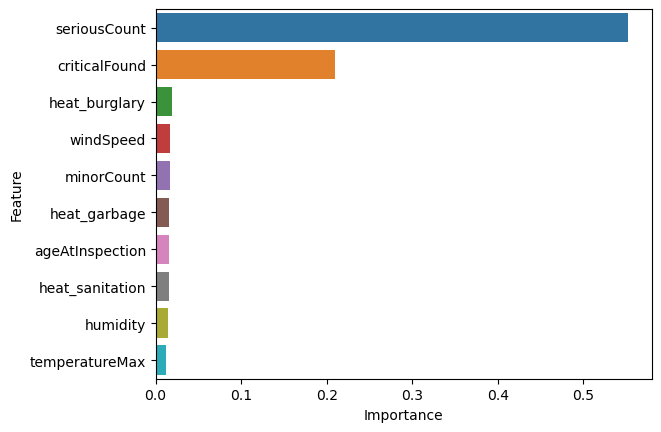

In [29]:
# Getting the most informative features with the ternary outcome
import seaborn as sns
feat_importances = pd.concat([pd.DataFrame(X_train_t.columns),pd.DataFrame(np.transpose(dt_model_ternary.feature_importances_))], axis = 1)
feat_importances.columns = ["Feature", "Importance"]
sns.barplot(x = "Importance", y = "Feature", data = feat_importances.nlargest(10, 'Importance'))
plt.show()

The two features with the largest importance values are `seriousCount` and `criticalFound`.

## Model 2 (Ensemble methods)
Logic: We use Ensemble methods to combine the predictions of several base estimators built with a given learning algorithm in order to improve generalizability / robustness over a single estimator.

Assumptions: The same with the decision trees, if we assume the relationship between the features and our respone variable, Inspection Result, to be non-linear and complex, then decision trees are preferred over linear regression. The ensemble methods will be more accurate.

Pros: By taking a majority vote of various algorithms it is fair. This process typically reduces variance and provides more robust models.

Cons: Ensembles can be more difficult to interpret. .

Why It's a Plausible Choice: Like the decision tree we are interested in assessing which variables (and by how much) influence the decision-making of an inspector's choice. However, we want to make a robust model with this ensemble method.

In [51]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AValidation Metrics for Ternary Outcome ModeldaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier# Logistic Regression - using liblinear solver


In [55]:
# Logistic Regression - using liblinear solver
log_reg = LogisticRegression(random_state = 10, solver='liblinear')

In [49]:
# Random Forest
rf_classifier = RandomForestClassifier(criterion='gini',  # or 'entropy' for information gain
                       max_depth=None,  # how deep tree nodes can go
                       min_samples_split=2,  # samples needed to split node
                       min_samples_leaf=1,  # samples needed for a leaf
                       min_weight_fraction_leaf=0.0,  # weight of samples needed for a node
                       max_features=None,  # number of features to look for when splitting
                       max_leaf_nodes=None,  # max nodes
                       min_impurity_decrease=1e-07, #early stopping
                       random_state = 10) #random seed

In [59]:
# AdaBoost
ada_classifier = AdaBoostClassifier(n_estimators=100)

voting_classifier = VotingClassifier(
                        estimators = [('lr', log_reg),
                                     ('rf', rf_classifier),
                                     ('ada', ada_classifier)],
                        voting = 'hard')

In [60]:
# Loop through each model to report Accuracy
for clf, label in zip([log_reg, 
                       rf_classifier, 
                       ada_classifier, 
                       voting_classifier], ['Logistic Regression', 
                                            'Random Forest', 
                                            'Ada Boost',
                                            'Ensemble']):
         scores = cross_val_score(clf, X, y.ravel(), scoring='accuracy', cv=5)
         print('Accuracy: %0.2f [%s]' % (scores.mean(), label))

Accuracy: 0.92 [Logistic Regression]
Accuracy: 0.92 [Random Forest]
Accuracy: 0.88 [Ada Boost]
Accuracy: 0.92 [Ensemble]


In [61]:
#Soft Voting
voting_classifier = VotingClassifier(
                        estimators = [('lr', log_reg),
                                     ('rf', rf_classifier),
                                     ('ada', ada_classifier)],
                        voting = 'soft')

probas = [c.fit(X, y.ravel()).predict_proba(X)[:,1] for c in (log_reg, rf_classifier, ada_classifier, voting_classifier)]

In [64]:
probs_df = pd.DataFrame.from_records(probas).T
probs_df.rename(columns = {0: 'logit',
                          1: 'rf',
                          2: 'ada',
                          3: 'ensemble'}, inplace = True)
probs_df.head()

,logit,rf,ada,ensemble
0,9.508719e-01,1.0,0.353148,0.768007
1,9.074592e-01,1.0,0.353268,0.753576
2,3.373775e-07,0.0,0.301752,0.100584
3,8.924924e-01,1.0,0.353093,0.748528
4,1.217934e-06,0.0,0.304046,0.101349


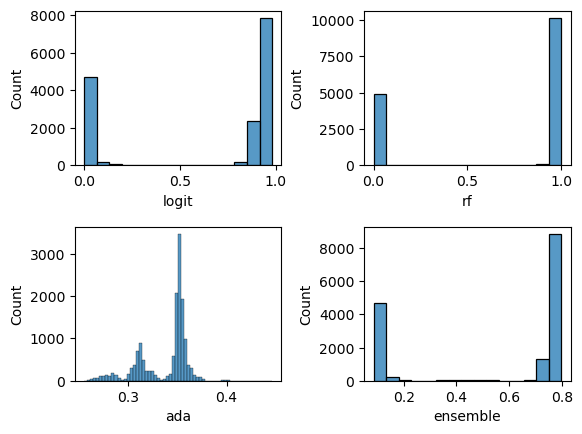

In [63]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = fig.add_subplot(2, 2, 1)
sns.histplot(probs_df, x = "logit", ax = ax)
ax = fig.add_subplot(2, 2, 2)
sns.histplot(probs_df, x = "rf", ax = ax)
ax = fig.add_subplot(2, 2, 3)
sns.histplot(probs_df, x = "ada", ax = ax)
ax = fig.add_subplot(2, 2, 4)
sns.histplot(probs_df, x = "ensemble", ax = ax)
plt.show()

## Model 3

## Validation Metrics

**Hint**: Try writing a for loop to use [`cross_val_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) to check for accuracy, precision, recall and f1 across all of your models.

## Policy Simulation

### Interpretable Machine Learning

**Hint**: Use tools like feature importance plots and coefficient plots

## Prioritize Audits

**Hint**: Look up the [`.predict()`](https://www.kite.com/python/docs/sklearn.linear_model.SGDRegressor.predict), [`.predict_proba()`](https://www.kite.com/python/docs/sklearn.linear_model.LogisticRegression.predict_proba), and [`.sample()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html) methods. Then: 
1. Choose one of your models (or train a new simplified model or ensemble!) to predict outcomes and probabilities. 
2. Order your audits by their probability of detecting a "Fail" score
3. Plot your distribution of pass/fail among the first 1000 observations in the dataset
4. Simulate random audits on the full chicago_2011_to_2013.csv dataset by picking 1000 observations at random

### Predict on Data with Unseen Labels

In [ ]:
# Fill in the code below with the X data you used for training
X_test = chicago_inspections_2014[chicago_inspections_2014.columns & ....columns]